# **[Python for Data Science] Final Project 1: Logistic Regression dan SVM**
# **Hacktiv8**

# Predict next-day rain in Australia

## Introduction

Halo! Kami dari Kelompok 8, yang beranggotakan:
- Alpian Khairi
- Aziz Fatih Fauzi
- Fikri Fahreza

Kami berharap dari Final Project ini bisa menghasilkan *feedback* atau komentar tentang analisis dan model yang telah kami buat.


## **Download dataset**

In [1]:
# Install kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

In [3]:
# Mount google colab dengan drive untuk mengambil API Kaggle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
# Download dataset dari kaggle
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package

  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 105MB/s]


In [6]:
!unzip weather-dataset-rattle-package.zip

Archive:  weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


Pada projek kali ini kami menggunakan dataset yang berasal dari Kaggle yang dapat diakses link ini <https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package> . Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia,
kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka
besok harinya disana hujan 1mm atau lebih.

**Attribute Information:**
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 9 pagi
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

Dalam projek ini kami akan menggunakan 2 model yakni Logistic Regression dan SVM.

# Data Preparation

### Import Libraries

In [7]:
# Library For DataFrame
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# For Data Exploration
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


# For Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# For ignore warning
import warnings
warnings.filterwarnings('ignore')

# For API Adjustment
import pickle


### Read Data

In [8]:
pd.set_option("display.max_columns", None)

df = pd.read_csv('weatherAUS.csv')
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [9]:
df.shape

(145460, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [12]:
df.describe(include = object)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


# Data Cleansing

Hal pertama yang akan dilakukan adalah mengecek apakah data memiliki missing value atau tidak, dan jika ada maka perlu dilakukan pembersihan agar tahapan modelling dapat dilanjutkan.

In [13]:
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
Date,0,0.0
Location,0,0.0
MinTemp,1485,1.0
MaxTemp,1261,1.0
Rainfall,3261,2.0
Evaporation,62790,43.0
Sunshine,69835,48.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
WindDir9am,10566,7.0


Pada tabel diatas dapat dilihat bahwa kolom **Evaporation**, **Sunshine**, **Cloud9am** dan **Cloud3pm** memiliki missing values lebih dari 30% maka penanganan yang akan dilakukan untuk variabel-variabel ini adalah dengan membuangnya. Sedangkan variabel **WindGustDir**, **WindDir9am**, **WindDir3pm**, **RainToday** dan **RainTomorrow** akan dibuang baris yang mengandung missing values. Adapun untuk variabel2 lain akan dilakukan imputasi dengan nilai mean masing-masing kolom. 

In [14]:
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True)

df.dropna(subset=['RainToday','RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], inplace=True)


In [15]:
while True :
    df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].rolling(6,min_periods=1).mean())
    if df['MinTemp'].isnull().any()==False:
        break

In [16]:
while True :
    df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].rolling(6,min_periods=1).mean())
    if df['MaxTemp'].isnull().any()==False:
        break

In [17]:
while True :
    df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].rolling(6,min_periods=1).mean())
    if df['Rainfall'].isnull().any()==False:
        break

In [18]:
while True :
    df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].rolling(6,min_periods=1).mean())
    if df['WindGustSpeed'].isnull().any()==False:
        break

In [19]:
while True :
    df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].rolling(6,min_periods=1).mean())
    if df['WindSpeed9am'].isnull().any()==False:
        break

In [20]:
while True :
    df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].rolling(6,min_periods=1).mean())
    if df['WindSpeed3pm'].isnull().any()==False:
        break

In [21]:
while True :
    df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].rolling(6,min_periods=1).mean())
    if df['Humidity9am'].isnull().any()==False:
        break

In [22]:
while True :
    df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].rolling(6,min_periods=1).mean())
    if df['Humidity3pm'].isnull().any()==False:
        break

In [23]:
while True :
    df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].rolling(6,min_periods=1).mean())
    if df['Pressure9am'].isnull().any()==False:
        break

In [24]:
while True :
    df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].rolling(6,min_periods=1).mean())
    if df['Pressure3pm'].isnull().any()==False:
        break

In [25]:
while True :
    df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].rolling(6,min_periods=1).mean())
    if df['Temp9am'].isnull().any()==False:
        break

In [26]:
while True :
    df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].rolling(6,min_periods=1).mean())
    if df['Temp3pm'].isnull().any()==False:
        break

In [27]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [28]:
df.shape

(123710, 19)

Sekarang data sudah bersih tanpa missing values, dan sekarang data memiliki 123.710 baris dan 19 kolom.  

Mengingat bahwa curah hujan juga dapat meningkat ketika masa musim hujan tiba, maka akan kita cek terlebih dahulu keterkaitan waktu dengan curah hujan.

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df[['Month']].head()

,Month
0,12
1,12
2,12
3,12
4,12


In [31]:
df.drop(columns='Date', inplace=True)

In [32]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12


#  Exploratory Data Analysis

### Proporsi label kelas target (RainTomorrow)

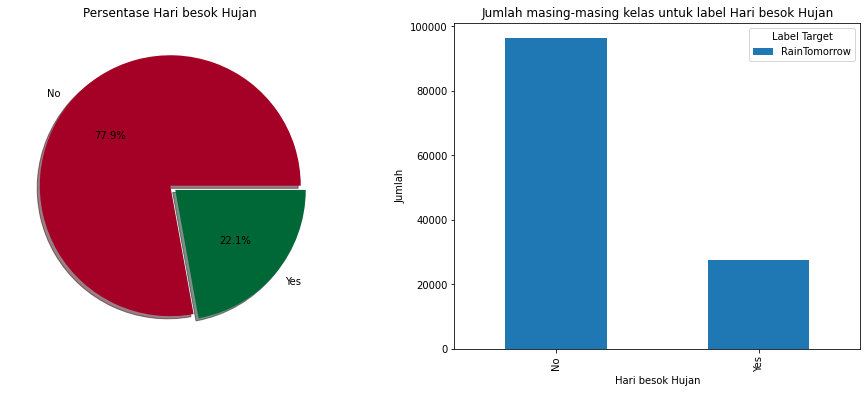

In [33]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

# persentase "Hari besok Hujan"
df['RainTomorrow'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.05], 
    cmap='RdYlGn',
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Hari besok Hujan')
ax[0].set_ylabel('')

# Barchart besaran setiap nilai pada kelas target
df.groupby('RainTomorrow').agg({'RainTomorrow':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Jumlah masing-masing kelas untuk label Hari besok Hujan')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Hari besok Hujan')
ax[1].legend(title='Label Target')

Proporsi kelas *yes* atau besok terjadi hujan sebesar 78% sedangkan kelas *no* sebesar 22%, hal ini mengindikasikan bahwa data tidak seimbang untuk kedua class label.


### Bagaiamana curah hujan masing-masing kota?

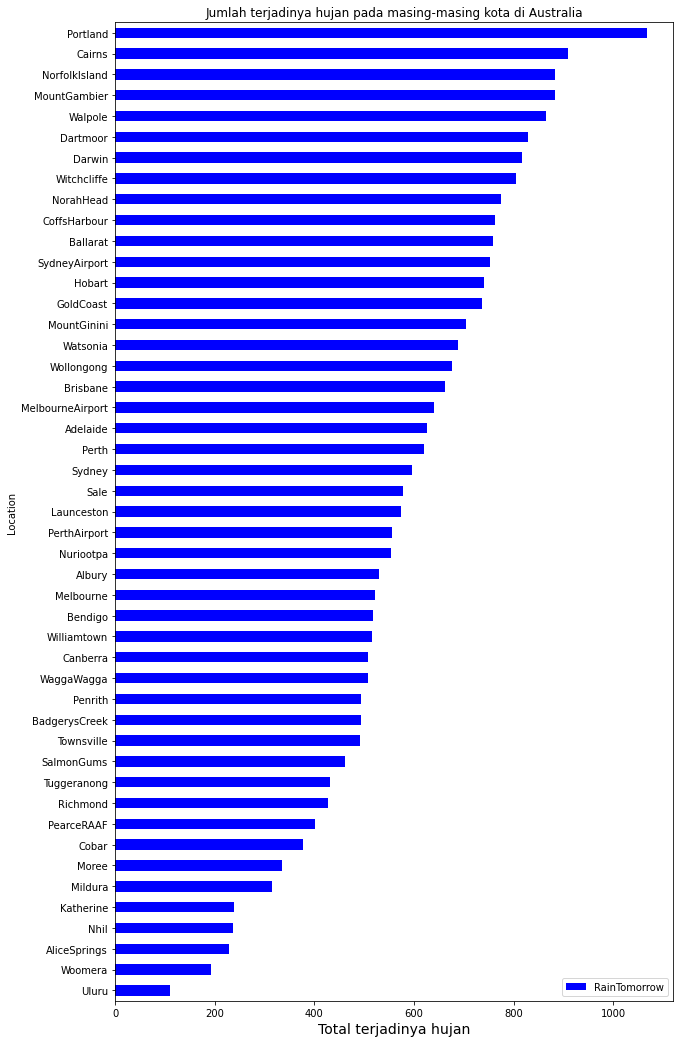

In [34]:
kota_yes = df[
    (df['RainTomorrow']=="Yes")
].groupby('Location').agg({'RainTomorrow':'count'}).sort_values(by='RainTomorrow')
kota_yes.plot(kind='barh', figsize=(10,18), color=['blue'])

plt.xlabel("Total terjadinya hujan", fontsize=14)
plt.title("Jumlah terjadinya hujan pada masing-masing kota di Australia")
plt.legend()
plt.show()

Pada plot diatas dapat kita lihat bahwa kota **Portland**, **Cairns**, **NortfolkIsland**, **MountGambier** dan **Walpole** menjadi 5 kota dengan curah hujan tertinggi.

### Apakah terjadinya hujan hari ini berpengaruh terhadap terjadinya hujan esok hari?

In [35]:
pd.crosstab(index = df['RainToday'], columns = df['RainTomorrow'])

RainTomorrow,No,Yes
RainToday,,
No,81476,14478
Yes,14842,12914


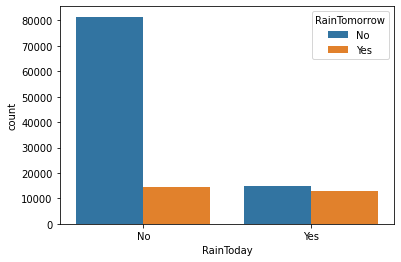

In [36]:
sns.countplot(
    x='RainToday',
    hue='RainTomorrow',
    data=df
)

Dari visualisasi dan tabel diatas dapat kita lihat bahwa jika hari ini terjadi hujan maka berkemungkinan besar besok akan terjadi hujan kembali, sedangkan jika hari ini tidak terjadi hujan maka kecil kemungkinan besok akan terjadi hujan.

### Bagaimana intensitas curah hujan setiap bulannya?

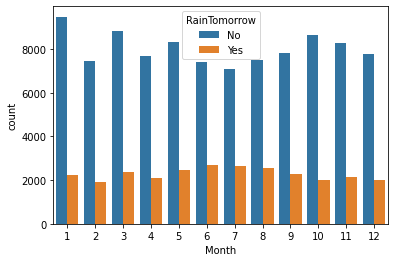

In [37]:
sns.countplot(df['Month'], hue=df['RainTomorrow'])

Dari visualisasi diatas dapat kita lihat bahwa curah hujan yang turun di wilayah australia cukup stabil setiap bulannya, dan tidak mempunyai perbedaan yang cukup signifikan.

### Bagaimana korelasi masing-masing variabel?

#### Korelasi kolom kategori

In [38]:
# mengelompokan kolom yang memuat data kategori
cat_cols=['Location','Month','WindGustDir','WindDir9am','WindDir3pm',
         'RainToday','RainTomorrow']
df_cat=df[cat_cols]
#mengencode data kategori
le=LabelEncoder()
df_cat['Location']=le.fit_transform(df_cat['Location'])
df_cat['Month']=le.fit_transform(df_cat['Month'])
df_cat['WindGustDir']=le.fit_transform(df_cat['WindGustDir'])
df_cat['WindDir9am']=le.fit_transform(df_cat['WindDir9am'])
df_cat['WindDir3pm']=le.fit_transform(df_cat['WindDir3pm'])
df_cat['RainToday']=le.fit_transform(df_cat['RainToday'])
df_cat['RainTomorrow']=le.fit_transform(df_cat['RainTomorrow'])
df_cat.head()

,Location,Month,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,1,11,13,13,14,0,0
1,1,11,14,6,15,0,0
2,1,11,15,13,15,0,0
3,1,11,4,9,0,0,0
4,1,11,13,1,7,0,0


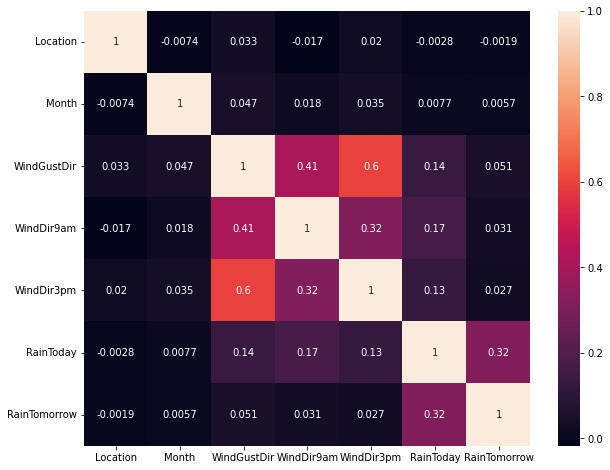

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cat.corr(), annot=True)
plt.show()

Fitur yang memiliki korelasi diatas 0.3 yaitu WindGustdir,WindDir9am, dan WindDir3pm. Diantara ketiga fitur tersebut yang akan digunakan hanya WindGustDir agar tidak terjadi multikolinearitas

In [40]:
df_for_pred=df.drop(columns=['WindDir9am','WindDir3pm'])

#### Korelasi kolom numerik

In [41]:
kontinu_cols=['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am',
             'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
             'Pressure3pm','Temp9am','Temp3pm',
             'RainTomorrow']
df_kontinu=df[kontinu_cols]
df_kontinu['RainTomorrow']=le.fit_transform(df_kontinu['RainTomorrow'])

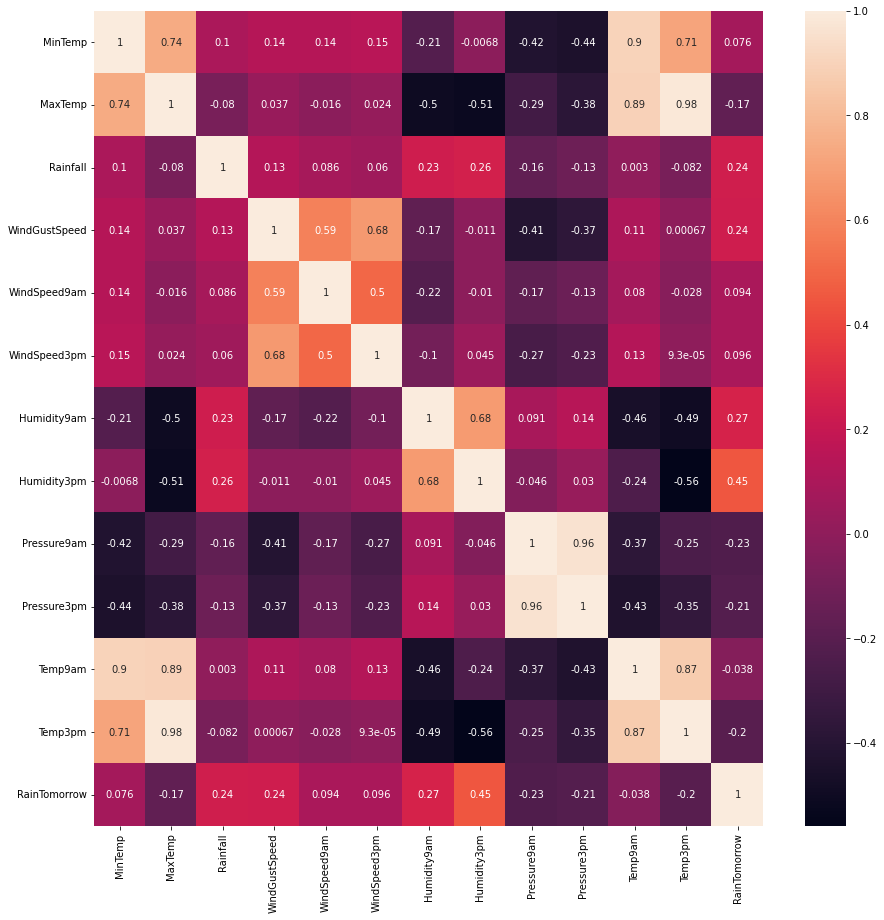

In [42]:
#memeriksa korelasi 
plt.figure(figsize=(15,15))
sns.heatmap(df_kontinu.corr(), annot=True)
plt.show()

- MinTemp dan MaxTemp memiliki korelasi diatas 0.3 dengan beberapa fitur lain maka tidak akan digunakan
- Temp9am memiliki korelasi tinggi dengan Temp 3pm yaitu nilai koef korelasi : 0.85 maka hanya akan digunakan Temp3pm
- WindGustdir, WindSpeed9am, dan WindSpeed3pm memiliki korelasi tinggi sehingga yang akan digunakan hanya WindGustSpeed
- Humidity9am dan Humidity3pm memiliki korelasi tinggi sehingga yang akan digunakan adalah Humidity3pm
- pressure 9am dengan pressure 3 pm juga memiliki korelasi yang sangat tinggi sehingga hanya akan digunakan salah satunya yaitu pressure 3pm

In [43]:
#menghapus kolom dari fitur yang korelasinya tinggi dengan fitur lain 
del_cols=['MinTemp','MaxTemp','Temp9am','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am']
df_for_pred=df_for_pred.drop(columns=del_cols)
df_for_pred.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,0.6,W,44.0,22.0,1007.1,21.8,No,No,12
1,Albury,0.0,WNW,44.0,25.0,1007.8,24.3,No,No,12
2,Albury,0.0,WSW,46.0,30.0,1008.7,23.2,No,No,12
3,Albury,0.0,NE,24.0,16.0,1012.8,26.5,No,No,12
4,Albury,1.0,W,41.0,33.0,1006.0,29.7,No,No,12


Apakah semakin tinggi kelembapan udara akan mengakibatkan makin tingginya curah hujan?

In [44]:
np.corrcoef(df['Humidity3pm'], df['Rainfall'])

array([[1.        , 0.25548868],
       [0.25548868, 1.        ]])

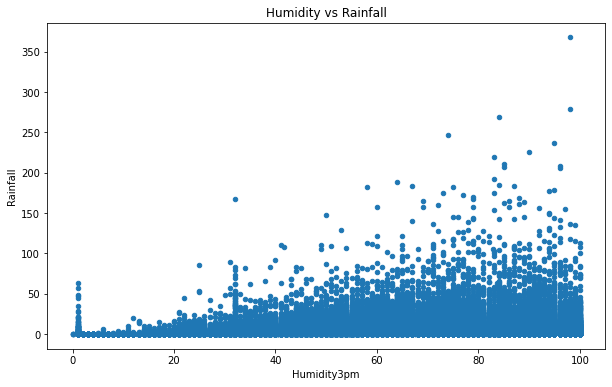

In [45]:
#melihat arah hubungan rainfall dengan humidity
df_kontinu.plot(kind='scatter',x='Humidity3pm', y='Rainfall',
               figsize=(10,6))
plt.title('Humidity vs Rainfall')
plt.show()


Hubungan antara variabel Humidity3pm dan Rainfall cukup lemah dengan nilai korelasi 0.25, yang artinya pengaruh kelembapan meningkatkan curah hujan tidak terlalu besar. Namun dari visualisasi dapat kita lihat bisa saja tingkat kelembapan pada beberapa case dapat meningkatkan curah hujan secara signifikan.

# Data Preprocessing

Melihat penamaan label encoder pada data kategori - Location

In [46]:
df_label_loc=pd.DataFrame({'Location':df_for_pred['Location'].unique(),
              'Label_loc':df_cat['Location'].unique()}).sort_values(by='Label_loc',ascending=True)
df_label_loc=df_label_loc.set_index(keys='Label_loc',drop=True)
df_label_loc

,Location
Label_loc,
0,Adelaide
1,Albury
2,AliceSprings
3,BadgerysCreek
4,Ballarat
5,Bendigo
6,Brisbane
7,Cairns
8,Canberra


Melihat penamaan label encoder pada data kategori - WindGustDir

In [47]:
df_label_wind=pd.DataFrame({'WindGustDir':df_for_pred['WindGustDir'].unique(),
              'Label_wind':df_cat['WindGustDir'].unique()}).sort_values(by='Label_wind',ascending=True)
df_label_wind=df_label_wind.set_index(keys='Label_wind',drop=True)
df_label_wind

,WindGustDir
Label_wind,
0,E
1,ENE
2,ESE
3,N
4,NE
5,NNE
6,NNW
7,NW
8,S


Mengganti kolom kategori dengan label yang telah di encode sebelumnya

In [48]:
df_for_pred['Location']=df_cat['Location']
df_for_pred['WindGustDir']=df_cat['WindGustDir']
df_for_pred['RainToday']=df_cat['RainToday']
df_for_pred['RainTomorrow']=df_cat['RainTomorrow']
df_for_pred.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,Humidity3pm,Pressure3pm,Temp3pm,RainToday,RainTomorrow,Month
0,1,0.6,13,44.0,22.0,1007.1,21.8,0,0,12
1,1,0.0,14,44.0,25.0,1007.8,24.3,0,0,12
2,1,0.0,15,46.0,30.0,1008.7,23.2,0,0,12
3,1,0.0,4,24.0,16.0,1012.8,26.5,0,0,12
4,1,1.0,13,41.0,33.0,1006.0,29.7,0,0,12


Memisahkan variabel independen dan dependen

In [49]:
X = df_for_pred.drop(columns=['RainTomorrow'])
y = df_for_pred['RainTomorrow']

Membagi data untuk training dan testing

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=40)

Menstandardize data testing dan training

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Defining Model

Model yang akan digunakan pada proek ini adalah Logistic Regression dan SVM 
- Logistic Regression, memprediksi probabilitas sampel data untuk klasifikasi danumumnya cocok untuk klasifikasi biner sehingga kemungkinan akan cocok dalam projek ini dimana output berupa 0 untuk No dan 1 untuk yes
- SVM, baik digunakan dalam menangani masalah non linear dan mengelompokannya menjadi ruang dengan dimensi lebih tinggi. SVM dapat digunakan untuk memecahkan masalah regresi maupun klasifikasi. 

## Logistic Regression

In [52]:
model_lr = LogisticRegression(solver='liblinear',
                              class_weight='balanced',
                              random_state=40)

## SVM

In [53]:
model_svm = SVC(kernel='linear', class_weight='balanced')

# Model Training

## Logistic Regression

In [54]:
model_lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=40, solver='liblinear')

In [55]:
#mengecek output dari model
model_lr.classes_

array([0, 1])

In [56]:
#melihat intercept model
model_lr.intercept_

array([-0.53274398])

In [57]:
#melihat koefisien model
model_lr.coef_

array([[-0.02252788,  0.09767931, -0.02932732,  0.50617217,  1.26463662,
        -0.46708211, -0.01476239,  0.21759447,  0.03220306]])

## SVM

In [58]:
model_svm.fit(X_train,y_train)

SVC(class_weight='balanced', kernel='linear')

In [59]:
#melihat intercept model
model_svm.intercept_

array([-0.45179495])

In [60]:
#melihat koefisien model
model_svm.coef_

array([[-0.03552147,  0.05915937, -0.02120161,  0.41779783,  1.00166769,
        -0.36199243, -0.00351783,  0.20229822,  0.01946338]])

# Model Evaluation

## Logistic Regression

In [61]:
#melihat hasil prediksi probabilitasnya
model_lr.predict_proba(X_train)

array([[0.74439014, 0.25560986],
       [0.58384695, 0.41615305],
       [0.54888625, 0.45111375],
       ...,
       [0.88435891, 0.11564109],
       [0.05094044, 0.94905956],
       [0.78297313, 0.21702687]])

In [62]:
model_lr.score(X_train,y_train)

0.7772440153815952

akurasi model cukup baik pada model training selanjutnya akan dilakukan testing 

In [63]:
#testing model
y_pred_lr=model_lr.predict(X_test)

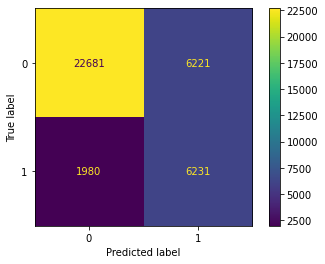

In [64]:
#membuat visualisasi confusion matrix
ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test)

In [65]:
#melihat akurasi pada hasil testing
model_lr.score(X_test,y_test)

0.7790262172284644

akurasi sudah cukup baik, tetapi masih perlu dilihat ukuran lainnya sebagai bahan evaluasi

In [66]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85     28902
           1       0.50      0.76      0.60      8211

    accuracy                           0.78     37113
   macro avg       0.71      0.77      0.72     37113
weighted avg       0.83      0.78      0.79     37113



meskipun tingkat akurasinya dibawah 80% namun recall nya menunjukan hasil yang baik dimanaperbandingan hasil yang diprediksi dengan benar cukup tinggi persentasenya

In [67]:
#melihat feature importance
importance=model_lr.coef_[0]
sorted_index=np.argsort(importance)
labels=X.columns[sorted_index]
df_importance=pd.DataFrame({'Feature Name': labels,
                            'Feature Importance' : importance[sorted_index]})
df_importance=df_importance.sort_values(by=['Feature Importance'], ascending=False)
df_importance

,Feature Name,Feature Importance
8,Humidity3pm,1.264637
7,WindGustSpeed,0.506172
6,RainToday,0.217594
5,Rainfall,0.097679
4,Month,0.032203
3,Temp3pm,-0.014762
2,Location,-0.022528
1,WindGustDir,-0.029327
0,Pressure3pm,-0.467082


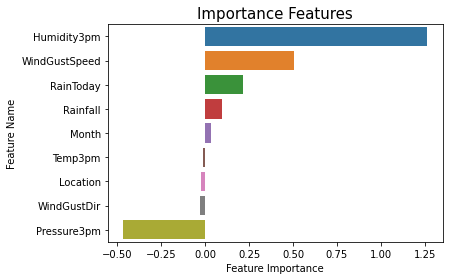

In [68]:
sns.barplot(x=df_importance['Feature Importance'],
            y=df_importance['Feature Name'])
plt.title('Importance Features', fontsize=15)
plt.show()

Beberapa fitur hampir tidak menerangkan bahwa besok akan terjad hujan atau tidak. Fitur-fitur tersebut diantaranya Month, Temp 3 pm, Location, dan WindGustDir. Selanjutnya fitur-fitur tersebut akan dihapus untuk melihat apakah akurasi dapat ditingkatkan dengan menghilangkan fitur tersebut

In [69]:
#membuat dataframe baru yang hanya berisi fitur-fitur penting
df_for_pred2=df_for_pred.drop(columns=['Month','Temp3pm',
                              'Location','WindGustDir'])

In [70]:
#menginisialisasi ulang input dan output
X2=df_for_pred2.drop(columns=['RainTomorrow'])
y2=df_for_pred2['RainTomorrow']
#membagi data untuk training dan testing
X_train2, X_test2, y_train2, y_test2=train_test_split(X2, y2, test_size=.3)
#menstandardize data
X_train2=scaler.fit_transform(X_train2)
X_test2=scaler.fit_transform(X_test2)
#membuat model
model_lr2=LogisticRegression(solver='liblinear',
                              class_weight='balanced',
                              random_state=40)
model_lr2.fit(X_train2,y_train2)

LogisticRegression(class_weight='balanced', random_state=40, solver='liblinear')

In [71]:
#menyimpan model_LR2 untuk digunakan dalam deployment
pickle.dump(model_lr2,open('model_lr2.pkl','wb'))

In [72]:
#mengevaluasi model
model_lr2.score(X_train2,y_train2)

0.7784218852847097

In [73]:
model_lr2.score(X_test2,y_test2)

0.7753078436127503

In [74]:
y_pred_lr2=model_lr2.predict(X_test2)


In [75]:
print(classification_report(y_test2,y_pred_lr2))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84     29003
           1       0.49      0.75      0.59      8110

    accuracy                           0.78     37113
   macro avg       0.70      0.77      0.72     37113
weighted avg       0.83      0.78      0.79     37113



Dengan meniadakan beberapa fitur tersebut tingkat akurasi sedikit menurun. Sehingga tidak masalah jika fitur tersebut tidak diikut sertakan dalam prediksi

## SVM

In [76]:
y_pred_svm=model_svm.predict(X_test)

In [77]:
model_svm.score(X_train, y_train)

0.7814127510190885

In [78]:
model_svm.score(X_test, y_test)

0.7826637566351413

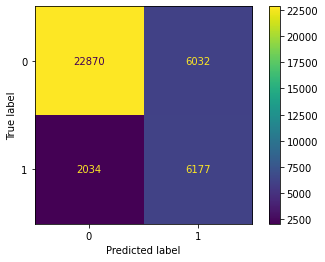

In [79]:
#membuat visualisasi confusion matrix
ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test)

In [80]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     28902
           1       0.51      0.75      0.60      8211

    accuracy                           0.78     37113
   macro avg       0.71      0.77      0.73     37113
weighted avg       0.83      0.78      0.80     37113



Tingkat presisi, akurasi, serta recall pada model sedikit lebih tinggi dengan Logistic Regression namun SVM lebih memakan banyak memory serta performanya lebih lambat dan berat dibanding Logistic Regression. Untuk itu diputuskan untuk menggunakan Logistic Regression.

# Model Inference

In [82]:
#prediksi hujan dengan input diluar dataset
rainfall=float(input('Curah hujan(mm) :'))
wind=float(input('Kecepatan angin (km/h):'))
humidity=float(input('Kelembaban Udara(%) :'))
pressure=float(input('Tekanan udara(hpa) :'))
rain=input('hari ini hujan ?(yes/no)')
pred_input=[rainfall,wind,humidity,pressure]
if rain=='yes':
    pred_input.append(1)
elif rain=='no':
    pred_input.append(0)
    pred_output=model_lr2.predict([pred_input])
if pred_output==1:
    prediction=' akan hujan'
elif pred_output==0:
    prediction='tidak akan hujan'
print(f'Diprediksi besok {prediction}')

Curah hujan(mm) :0.0
Kecepatan angin (km/h):22
Kelembaban Udara(%) :57
Tekanan udara(hpa) :1005.7
hari ini hujan ?(yes/no)no
Diprediksi besok tidak akan hujan


# Conclusion

-  Probabilitas hujan hampir merata namun terdapa beberapa lokasi yang sangat jarang terjadi hujan seperti Nhil, Mildura, Katherin, dan Uluru namun lokasi tidak berpengaruh pada prediksi hujan 
- Humidity dan temperature memilki korelasi negatif yang cukup tinggi dimana semakin tinggi temperatur semakin rendah kelembaban udara. Pada prediksi hujan hanya digunakan humidity karena koefisien pada variabel temp sangat rendah hal ini kemungkinan besar disebabkan akibat multikolinearitas. Untuk itu setelah dilakukan evaluasi fitur temperaure tidak digunakan bersamaan dengan beberapa fitur lainnya yaitu 'Month','Temp3pm', 'Location','WindGustDir'
- Fitur yang digunakan dalam model prediksi yaitu 'Rainfall', 'WindGustSpeed', 'Humidity3pm', 'Pressure3pm', 'RainToday','RainTomorrow'
- Keakuratan model Logistic Regression dan SVM menunjukan hasil yang hampir sama
- Akurasi prediksi ada diangka 78% dengan recall diatas 70% yang menunjukan prediksi sudah cukup akurat dan ketepatam prediksi untuk masing-masing kelas juga cukup tinggi
- Logistic Regression dipilih karena lebih ringan dan cepat performanya dibanding SVM